# L3.  SLAM 

### Define all the imports

In [1]:
%matplotlib inline 
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
pd.set_option('mode.chained_assignment', None)

In [3]:
from src.graph_SLAM.Graph_SLAM_known_correspondences import GraphSLAM

### Set dataset

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset1"
robot = 'Robot1' # Robot
start_frame = 10000
end_frame = 13000

### T1. Execute Graph SLAM with known correspondences
Test different datasets and analyze the performance of the algorithm

- What is the main limitation you see with this method?
-- Very Slow
-- Huge memory requirements

- Can this method be used to sole the full SLAM problem? and the online SLAM problem?
-- No

- Which would be the main differences with respect to the EKF SLAM method?
-- Accurate


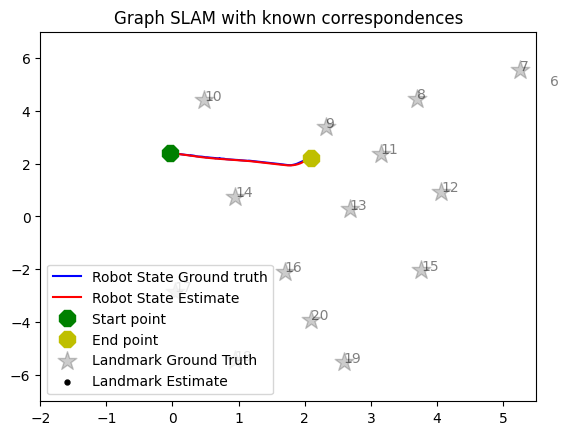

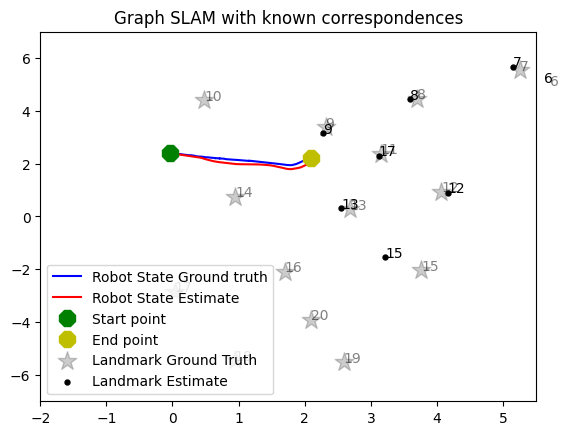

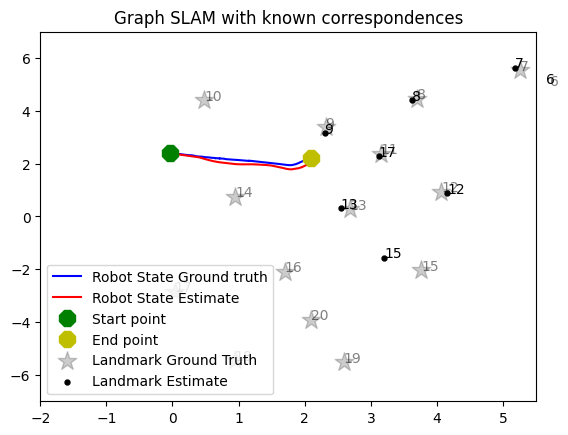

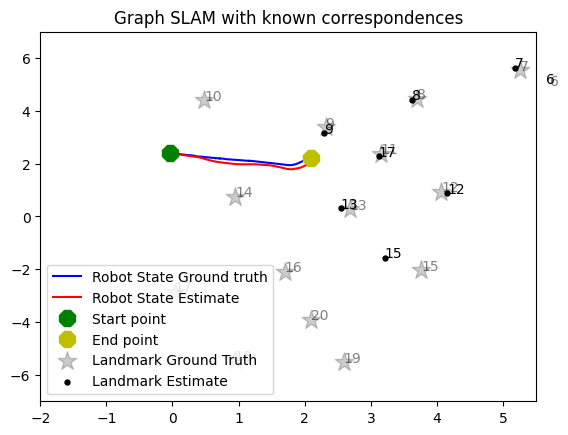

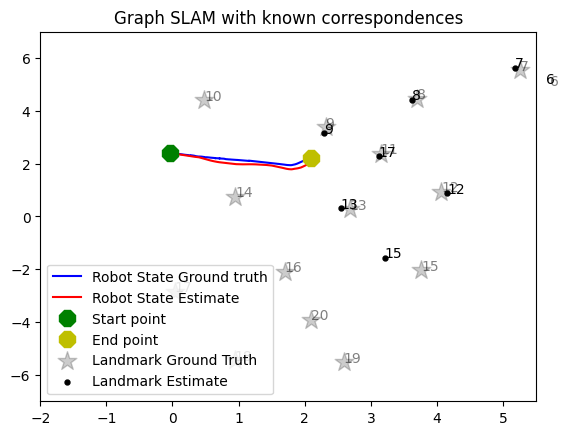

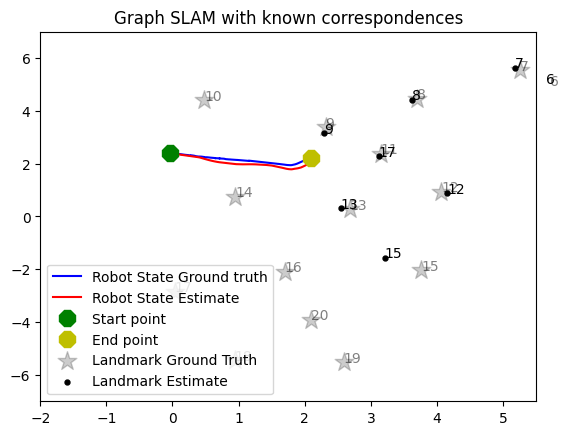

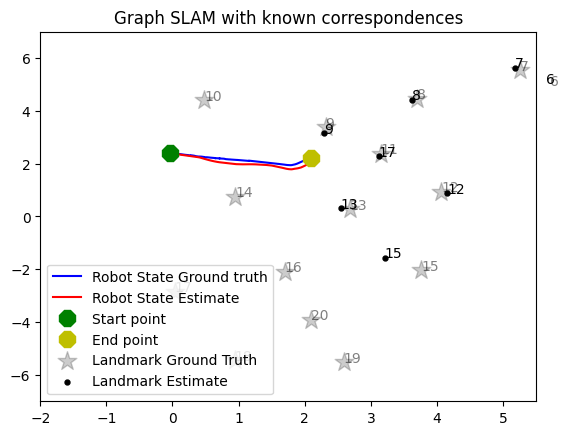

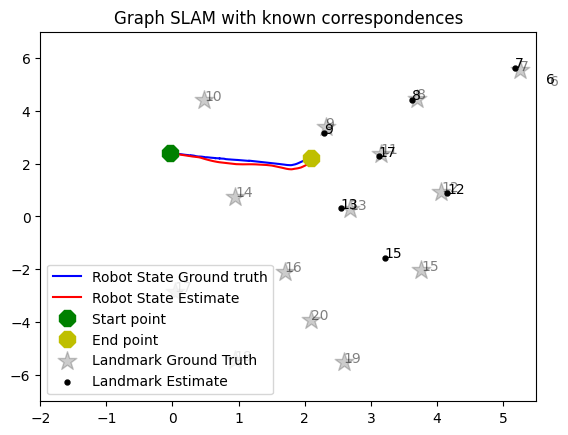

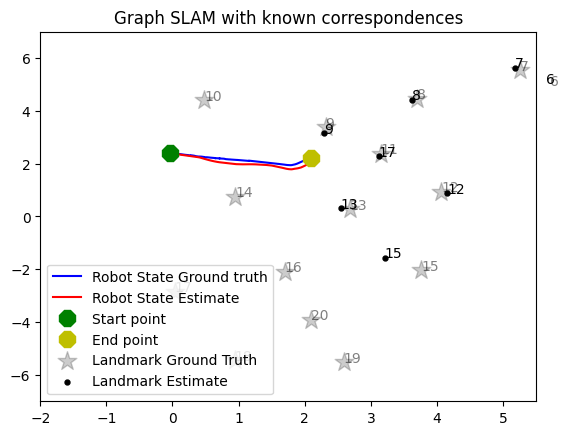

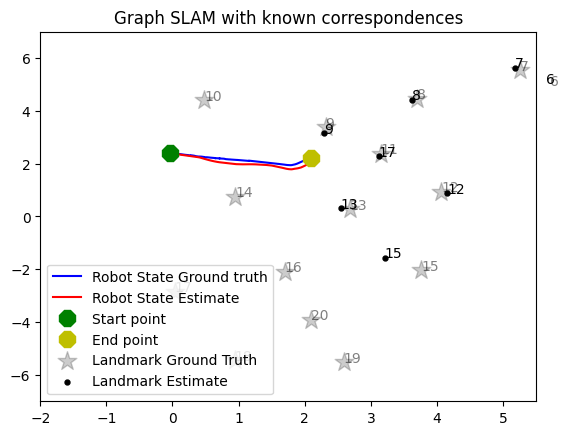

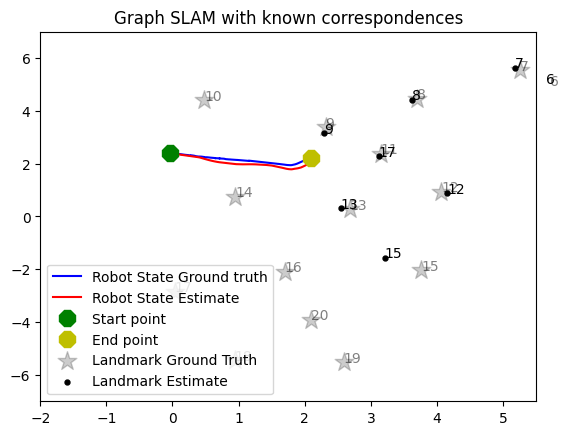

In [5]:
# State covariance matrix
R = np.diagflat(np.array([5, 5, 20])) ** 2
# Measurement covariance matrix
Q = np.diagflat(np.array([100.0, 100.0, 1e16])) ** 2
# Iterations
n = 10

graph_slam = GraphSLAM(dataset, robot, start_frame, end_frame, n, R, Q, plot=True)
plt.show()

### T2. Compare with EKF SLAM and FAST SLAM
We are interested in comparing the results obtained with the Graph SLAM with the EKF SLAM and FAST SLAM. Compare the error metrics obtained with the execution of each method.

In [6]:
from src.EKF_SLAM.EKF_SLAM_known_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM_known_correspondences

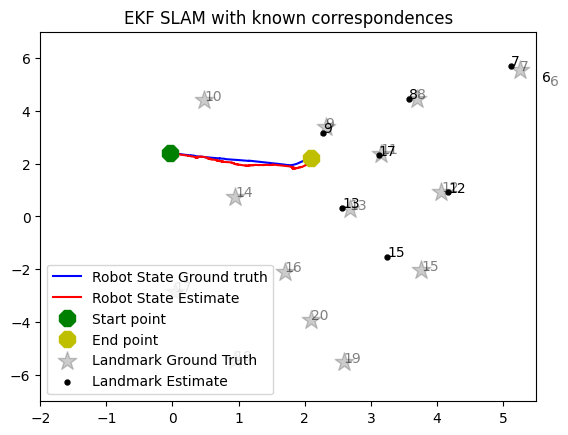

In [7]:
ekf_slam = EKF_SLAM_known_correspondences(dataset, robot, start_frame, end_frame, R, Q, plot=True, plot_inter=False)
plt.show()

In [8]:
def normalized_path_error_optim(position_df):
    position = position_df.copy()
    position['x_delta'] = position["x_gt"].diff()
    position["y_delta"] = position["y_gt"].diff()
    position['x_delta'][0] = 0
    position['y_delta'][0] = 0
    position["weights"] = np.sqrt(position['x_delta']**2 + position["y_delta"]**2)
    position["path_error"] = np.sqrt(np.power(position["x_gt"] - position["x"], 2) + np.power(position["y_gt"] - position["y"], 2))
    position["e_path"] = (position["path_error"] * position["weights"]) / position["weights"].sum()

    e_path = position["e_path"].sum()
    e_max = np.max(position["path_error"])
    e_end = position["path_error"].iloc[-1]
    return e_path, e_max, e_end

#### Generate metrics

In [9]:
#Generate error metrics
ekf_slam.build_dataframes()
joint_df = pd.DataFrame(ekf_slam.robot_states).join(ekf_slam.gt, rsuffix = '_gt').dropna()
e_ekf_path, e_ekf_max, e_ekf_end = normalized_path_error_optim(joint_df)

graph_slam.build_dataframes()
joint_df = pd.DataFrame(graph_slam.robot_states).join(graph_slam.gt, rsuffix = '_gt').dropna()
e_graph_path, e_graph_max, e_graph_end = normalized_path_error_optim(joint_df)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 29981 and the array at index 1 has size 2653

#### Represent metrics

In [7]:
# Represent metrics for all experiments


#### Analize metrics

In [8]:
# Analize the results and provide the mean error metrics across the experiments performed.